# Covid-19 Face Mask Detector




## With Mask
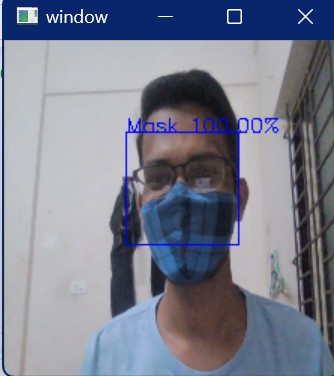

## Without Mask
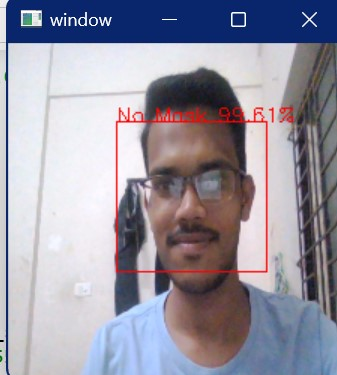


## Concept diagram
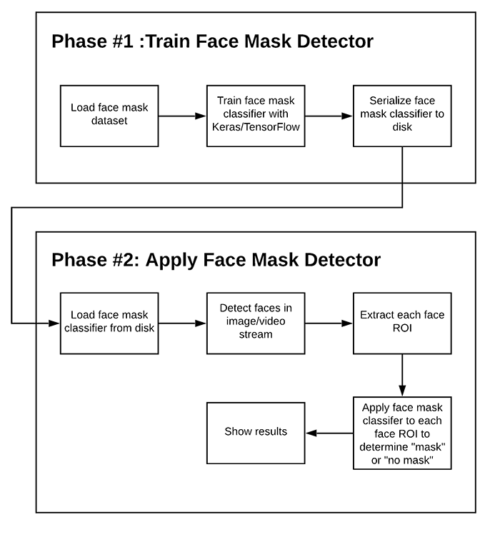

DATASET IMAGE
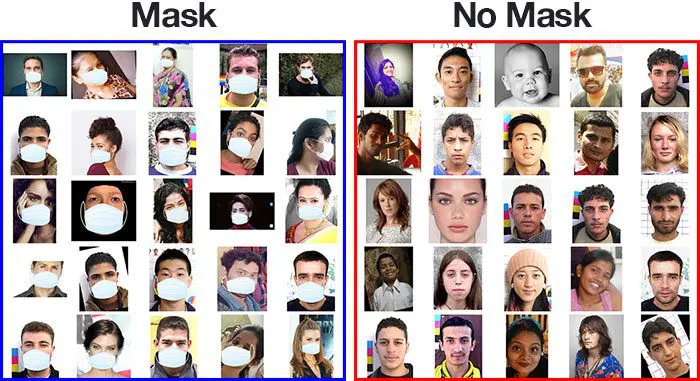

#### Import required libraries

In [2]:
import os

In [3]:
from keras.preprocessing import image

In [4]:
import cv2

#### Define the categories of images


In [5]:
categories = ['with_mask','without_mask']

#### Initialize an empty list for the data
#### Loop over the categories and their corresponding directories to read and preprocess the images


In [6]:
# Initialize an empty list for the data
data = []

# Loop over the categories and their corresponding directories to read and preprocess the images
for category in categories:
    # Define the path to the directory
    path = os.path.join('train', category)
    
    # Assign a label to each category (0 for 'with_mask', 1 for 'without_mask')
    label = categories.index(category)
    
    # Loop over the files in the directory and read the images
    for file in os.listdir(path):
        # Define the path to the image file
        img_path = os.path.join(path, file)
        
        # Read the image using OpenCV
        img = cv2.imread(img_path)
        
        # Resize the image to (224, 224)
        img = cv2.resize(img, (224, 224))
        
        # Append the image and its label to the data list
        data.append([img, label])

In [7]:
len(data)

1508

In [8]:
import random

### shuffling the data to avoid biasness in fitting 

In [9]:
# Shuffle the data randomly

random.shuffle(data)

In [10]:
# Initialize empty lists for the features (X) and labels (y)

X = []
y = []

# Separate the features and labels into different lists

for features,label in data:
    X.append(features)
    y.append(label)

In [11]:
len(X)

1508

In [12]:
len(y)

1508

In [13]:
import numpy as np

In [14]:
# Convert X and y into NumPy arrays

X = np.array(X)
y = np.array(y)

In [15]:
X.shape

(1508, 224, 224, 3)

In [16]:
y.shape

(1508,)

#### converting the color image to gray-scale

In [17]:
# Normalize the pixel values in X to be between 0 and 1

X = X/255

In [18]:
X[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 1.        , 0.98431373],
        [0.99607843, 1.        , 0.98431373],
        [0.99215686, 0.99607843, 0.98039216]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 1.        , 0.98431373],
        [0.99607843, 1.        , 0.98431373],
        [0.99215686, 0.99607843, 0.98039216]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [0.99607843, 1.        , 0.98431373],
        [0.99607843, 1.        , 0.98431373],
        [0.99215686, 0.99607843, 0.98039216]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [19]:
# Split the data into training and testing sets using the train_test_split function from scikit-learn

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

In [20]:
X_train.shape

(1206, 224, 224, 3)

In [21]:
X_test.shape

(302, 224, 224, 3)

In [22]:
# Import the VGG16 pre-trained model from Keras

from keras.applications.vgg16 import VGG16

#### 1. from keras.applications.vgg16 import VGG16: This line imports the VGG16 model from Keras, which is a pre-trained convolutional neural network (CNN) that was originally trained on the ImageNet dataset.

#### 2. The VGG16 model consists of 16 layers, including 13 convolutional layers and 3 fully connected layers.

#### 3. The convolutional layers use small filters (3x3) with a stride of 1 and padding, and are followed by a max pooling layer. This architecture helps the model learn hierarchical features in the input images.

#### 4. The fully connected layers at the end of the model use the learned features to classify the input images into one of the 1000 categories in the ImageNet dataset.

#### 5. In this code, we are using the pre-trained VGG16 model as a feature extractor by removing the last fully connected layer and adding a new output layer with a single neuron to classify images as either with or without masks.

In [23]:
# Instantiate the VGG16 model

vgg = VGG16()

In [24]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [25]:
# Create a new sequential model
from keras import Sequential

In [26]:
model = Sequential()

In [27]:
# Add all layers from the VGG16 model to the new model except for the last layer
for layer in vgg.layers[:-1]:
    model.add(layer)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [29]:
# Freeze the weights of all layers in the new model
for layer in model.layers:
    layer.trainable = False

In [30]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [31]:
# Add a new dense output layer with sigmoid activation
from keras.layers import Dense

In [32]:
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [34]:
# Compile the model with binary cross-entropy loss and accuracy as the evaluation metric
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
# Train the model on the training set for 5 epochs and validate on the testing set
history = model.fit(X_train,y_train,epochs=5,validation_data=(X_test,y_test))

Epoch 1/5
38/38 [==============================] - 176s 5s/step - loss: 0.1615 - accuracy: 0.9569 - val_loss: 0.1685 - val_accuracy: 0.9669
Epoch 2/5
38/38 [==============================] - 175s 5s/step - loss: 0.1467 - accuracy: 0.9577 - val_loss: 0.1748 - val_accuracy: 0.9536
Epoch 3/5
38/38 [==============================] - 190s 5s/step - loss: 0.1382 - accuracy: 0.9635 - val_loss: 0.1477 - val_accuracy: 0.9536
Epoch 4/5
38/38 [==============================] - 192s 5s/step - loss: 0.1243 - accuracy: 0.9685 - val_loss: 0.1393 - val_accuracy: 0.9636
Epoch 5/5
38/38 [==============================] - 219s 6s/step - loss: 0.1159 - accuracy: 0.9710 - val_loss: 0.1554 - val_accuracy: 0.9503


In [47]:
print("[INFO] saving mask detector model...")
model.save("mask_detector.model", save_format="h5")

[INFO] saving mask detector model...


In [35]:
# Initialize the video capture object
cap = cv2.VideoCapture(0)
# from tensorflow.keras.models import load_model
# model = load_model("mask_detector.model")

In [36]:
# Define a function to detect if a face in an image is wearing a mask or not
def detect_face_mask(img):
    # Make a prediction on the input image using the trained model
    y_pred = model.predict(img.reshape(1,224,224,3))
    return y_pred

In [37]:
def detect_face(img):
    coods = haar.detectMultiScale(img)
    return coods

In [38]:
# Read in an example image for testing the face mask detection function
sample1 = cv2.imread('samples/3.jpg')
sample1 = cv2.resize(sample1,(224,224))

In [39]:
# Test the face mask detection function on the example image
detect_face_mask(sample1)

1/1 [==============================] - 1s 818ms/step


array([[2.4732947e-06]], dtype=float32)

In [40]:
# this is used to show a rectangle accross the face in camera frame
def draw_label(img,text,pos,bg_color):
    
    text_size = cv2.getTextSize(text,cv2.FONT_HERSHEY_COMPLEX,1,cv2.FILLED)
    
    end_x = pos[0]+text_size[0][0]+2
    end_y = pos[1]+text_size[0][1]+2
    
    cv2.rectangle(img,pos,(end_x,end_y),bg_color,cv2.FILLED)
    cv2.putText(img,text,pos,cv2.FONT_HERSHEY_COMPLEX,1,(0,0,0),1,cv2.LINE_AA)
    

In [41]:
# This line of code initializes the Haar Cascade classifier using the 
# pre-trained XML file 'haarcascade_frontalface_default.xml' located in the current directory.
haar = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

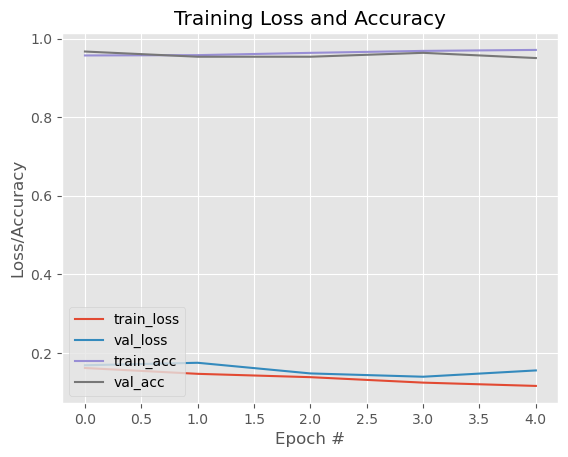

In [51]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")

In [52]:
while True: 
    # capture frames from the camera
    ret,frame = cap.read()
    
    # resize the frame to fit the model's input shape
    frame = cv2.resize(frame,(224,224))
    
    # detect faces in the frame using the detect_face() method
    coods = detect_face(cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY))
    
    # draw rectangles around the detected faces
    for x,y,w,h in coods:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),1)
        
    # make predictions using the detect_face_mask() method
    y_pred = detect_face_mask(frame)
    print(y_pred)
    
    # calculate the probabilities of having or not having a mask
    no_mask = y_pred[0][0]*100
    mask = 100 - (y_pred[0][0]*100)
    
    # display the label and percentage probability of each detected face
    if mask>no_mask and mask>95:
        # if the model predicts that the face is wearing a mask, label it as "Mask" and display the percentage probability
        for x,y,w,h in coods:
            label_str = "{:.2f}".format(mask)
            cv2.putText(frame,"Mask" + " " + label_str+"%" , (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255,0,0), 1)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),1)
            
    else:
        # if the model predicts that the face is not wearing a mask, label it as "No Mask" and display the percentage probability
        for x,y,w,h in coods:
            label_str = "{:.2f}".format(no_mask)
            cv2.putText(frame,"No Mask" + " " + label_str+"%" , (x, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0,255,0), 1)
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),1)
    
    # display the resulting frame
    cv2.imshow('window',frame)
    
    # exit the program if the 'x' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('x'):
        break

# release the camera and close all windows
cv2.destroyAllWindows()


1/1 [==============================] - 0s 234ms/step
[[0.99079484]]
1/1 [==============================] - 0s 217ms/step
[[0.943617]]
1/1 [==============================] - 0s 165ms/step
[[0.92066]]
1/1 [==============================] - 0s 169ms/step
[[0.96179074]]
1/1 [==============================] - 0s 189ms/step
[[0.90673524]]
1/1 [==============================] - 0s 234ms/step
[[0.9043212]]
1/1 [==============================] - 0s 223ms/step
[[0.84232175]]
1/1 [==============================] - 0s 269ms/step
[[0.933592]]
1/1 [==============================] - 0s 216ms/step
[[0.90307117]]
1/1 [==============================] - 0s 230ms/step
[[0.9256817]]
1/1 [==============================] - 0s 212ms/step
[[0.91146386]]
1/1 [==============================] - 0s 230ms/step
[[0.8321544]]
